In [93]:
import numpy as np
from xrdc import xrdutils as xdu
import matplotlib.pyplot as plt

def sample_peak_intensity():
    return np.random.uniform()

In [ ]:
def sample_intensity_with_multiplicity

In [35]:
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [128]:
# FCC Ni definition
lparam_Ni = 3.52
s = Structure.from_spacegroup("Fm-3m", Lattice.cubic(lparam_Ni), ["Ni"],
                                 [[0, 0, 0]])
s

Structure Summary
Lattice
    abc : 3.52 3.52 3.52
 angles : 90.0 90.0 90.0
 volume : 43.614208
      A : 3.52 0.0 0.0
      B : 0.0 3.52 0.0
      C : 0.0 0.0 3.52
PeriodicSite: Ni (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ni (0.0000, 1.7600, 1.7600) [0.0000, 0.5000, 0.5000]
PeriodicSite: Ni (1.7600, 0.0000, 1.7600) [0.5000, 0.0000, 0.5000]
PeriodicSite: Ni (1.7600, 1.7600, 0.0000) [0.5000, 0.5000, 0.0000]

In [132]:
gen = XRDCalculator("CuKa")
# gen = XRDCalculator(1.54)
pat = gen.get_pattern(s)
xdu.to_q(pat.x), pat.y

(array([3.09170346, 3.56999165, 5.04873061]),
 array([100.        ,  46.36686035,  26.67333336]))

Define the same structure directly from lattice vectors and unit cell

In [142]:
lat = Lattice(lparam_Ni * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
fcc_basis = np.array(((0, 0, 0), (.5, .5, 0), (.5, 0, .5), (0, .5, .5)))
struct = Structure(lat, ["Ni"] * len(fcc_basis), fcc_basis)

pat = gen.get_pattern(struct)
q, i = xdu.to_q(pat.x), pat.y

In [134]:
def xrd_from_geo(lattice, basis, species):
    lat = Lattice(lattice)
    struct = Structure(lat, species, basis)
    
    pat = gen.get_pattern(struct)
    return xdu.to_q(pat.x), pat.y

In [140]:
def distort_Ni(relative_c):
    return xrd_from_geo(lparam_Ni * np.array([[1, 0, 0], [0, 1, 0], [0, 0, relative_c]]), fcc_basis, ["Ni"] * 4)

In [170]:
def Ni_cubic_to_tetra(N, c_start, c_end, sigma = .01):
    cs =  np.linspace(c_start, c_end, N)
    res = []
    for c in cs:
        q, i = distort_Ni(c)
        qq, ii = xdu.mk_pattern(i, q, sigma, with_grid=True)
        res.append(ii)
    return np.vstack(res)

In [171]:
Ni_scan = Ni_cubic_to_tetra(500, .9, 1.1)

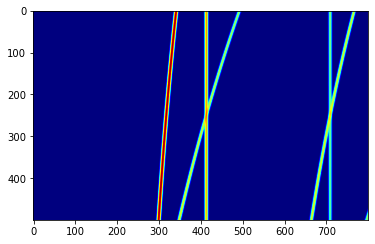

In [172]:
plt.imshow(np.log(Ni_scan + 1), cmap = 'jet')

In [141]:
distort_Ni(1.1)

(array([3.0009418 , 3.24544696, 3.56999165, 4.82470376, 5.04873061,
        5.48374904]),
 array([100.        ,  19.39412718,  28.09833433,  18.98544789,
          8.08202489,  12.29684462]))

In [152]:
from importlib import reload
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [155]:
qq, ii = xdu.mk_pattern(i, q, .01, with_grid=True)

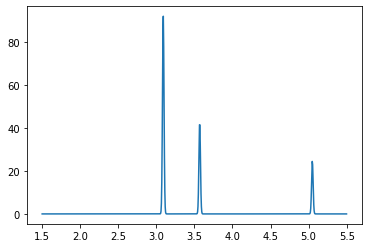

In [156]:
plt.plot(qq, ii)

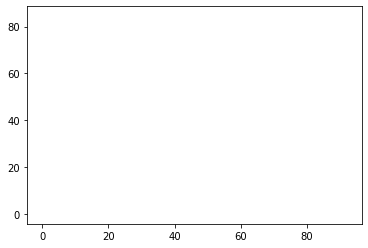

In [146]:
plt.plot(*xdu.mk_pattern(i, q, .01))